In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='whitegrid')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='USA']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='USA']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='USA']
US_table = pd.merge(gdp_table, pop_table, on=['Year'])
US_table = pd.merge(US_table, energy_table, on=['Year'])
population = US_table['Total population (Gapminder, HYDE & UN)']
energy = US_table['Primary energy consumption (TWh)']*3.6
gdpc = US_table['GDP per capita']
gdp = gdpc*population
year = US_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)
US_table

,Year,GDP per capita,Entity_x,Code_x,"Total population (Gapminder, HYDE & UN)",Entity_y,Code_y,Primary energy consumption (TWh)
0,1850,3631.82,United States,USA,24136292,United States,USA,635.556770
1,1855,4161.49,United States,USA,27910664,United States,USA,757.706629
2,1860,4401.89,United States,USA,31967054,United States,USA,852.622192
3,1865,4637.16,United States,USA,36297288,United States,USA,919.224874
4,1870,4803.00,United States,USA,40899168,United States,USA,1065.642917
...,...,...,...,...,...,...,...,...
72,2014,51664.00,United States,USA,318672992,United States,USA,25848.401000
73,2015,52591.00,United States,USA,320878016,United States,USA,25596.966000
74,2016,53015.00,United States,USA,323016000,United States,USA,25560.520000
75,2017,54007.77,United States,USA,325084992,United States,USA,25647.389000


No handles with labels found to put in legend.


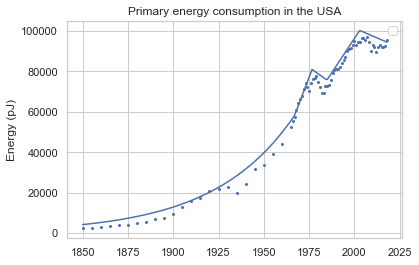

In [2]:
plt.scatter(year, energy, s=4)
r_0, y0_0 = reg.expReg(year, energy)
y0, r, a,c,e,g,x1,x2,x3,x4 = y0_0, 0.02298961724912632,2.2 , -2.2, 1.4, -0.5, 1967,1978, 1982, 2003
y0, r, a,c,e,g,x1,x2,x3,x4 =reg.expLLLL(year, energy/10**8, p0=(y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot(yplot,10**8*reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))

plt.legend()
plt.title("Primary energy consumption in the USA")
plt.ylabel("Energy (pJ)")

ypred =10**8* reg.expllll(year, y0, r, a,c,e,g,x1,x2,x3,x4)
US_table['Energy(PJ)-Time(Year)'] = ypred
US_table['Primary energy (PJ)']=energy

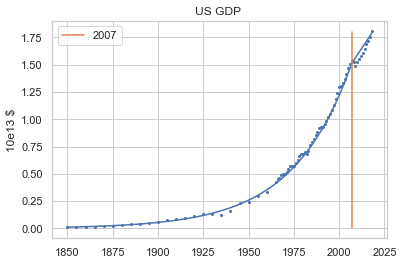

In [3]:
r, y0 = reg.expReg(year, gdp/10**13)
y0, r, a,c,e,g,x1,x2,x3,x4 = y0, r, 0.025, 0.01,1,1, 2007, 2025,2200,2300
plt.scatter(year, gdp/10**13, s=4)
#plt.plot(yplot, reg.exp_fun(yplot, y0=y0, r=r))
plt.plot(yplot, reg.expllll(yplot, y0, r, a,c,e,g,x1,x2,x3,x4))
plt.plot([x1, x1], [0,1.8], label=str(x1))
plt.legend()
plt.title("US GDP ")
plt.ylabel("10e13 $")
ypred= reg.expllll(year, y0, r, a,c,e,g,x1,x2,x3,x4)*(10**13)
US_table['GDP(2011$)-Time(year)'] = ypred

(0.5707085100288, 0.5564892222222222, 9.999725341796875, 0.06544713789539283, 0.10446082545518526, 0.0037093037350536366)


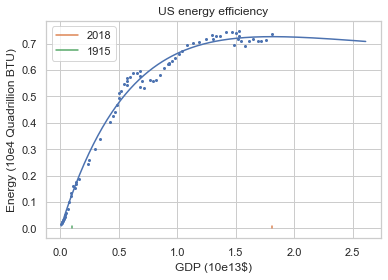

In [4]:
g = gdp/10**13
e = energy/ 10**4/(3.6**2)
gplot = np.linspace(g.min(), g.max()+0.8, 200)
plt.scatter(g,e, s= 4)
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e)
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.01], label = str(year_max)) 
inf_dist = np.array([abs(g[i]-0.1) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([0.1, 0.1],[0.0, 0.01], label = str(year_infl))
plt.legend()
plt.title('US energy efficiency')
plt.ylabel("Energy (10e4 Quadrillion BTU)")
plt.xlabel("GDP (10e13$)")
ypred= reg.s_model(g,G_i, E_i, A, a1, a2, a3 )*10**4*3.6**2
US_table['Energy(PJ)-GDP(10e13$)']=ypred

No handles with labels found to put in legend.


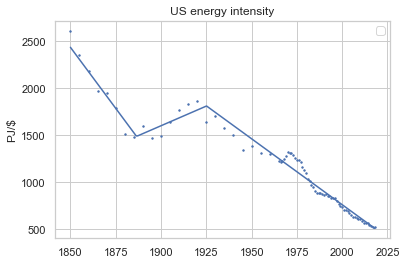

In [5]:
plt.scatter(year, energy/gdp*10**11, s=2)
a,b, c, e, g, x1, x2, x3 = -0.2, 2, 0.2, -0.2, -1, 1880, 1915, 1960
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**11/(3.6*3.6), p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-2, 2200] )
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3)*3.6**2)
plt.ylabel("PJ/$")
plt.title("US energy intensity")
plt.legend()
ypred= 3.6*3.6*reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**-11)
US_table['EI(PJ/$)-Time(year)'] = ypred

Text(0.5, 1.0, 'Variation in (%), USA')

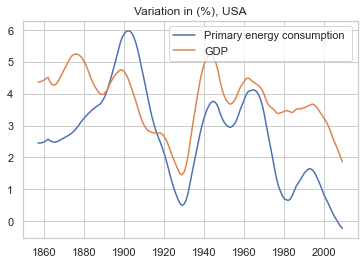

In [6]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), USA")


In [9]:
US_table = US_table.rename(columns={ 'Entity_x':'Entity', 'Code_x':'Code', 'Primary energy consumption (TWh)':'Primary energy (TWh)','Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })
US_table['Primary energy (TWh)']=energy

In [10]:
US_table.to_csv('../BDD/USA.csv', index=False)

In [11]:
US_table.head()

,Year,GDP per capita,Entity,Code,Population,Entity_y,Code_y,Primary energy (TWh),Energy(PJ)-Time(Year),Primary energy (PJ),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e13$),EI(PJ/$)-Time(year)
0,1850,3631.82,United States,USA,24136292,United States,USA,2288.004372,4164.760341,2288.004372,1.164564e+11,1251.722824,2.434316e-08
1,1855,4161.49,United States,USA,27910664,United States,USA,2727.743863,4661.492123,2727.743863,1.359811e+11,1771.890549,2.304716e-08
2,1860,4401.89,United States,USA,31967054,United States,USA,3069.439892,5217.469202,3069.439892,1.587794e+11,2218.383694,2.175116e-08
3,1865,4637.16,United States,USA,36297288,United States,USA,3309.209548,5839.757776,3309.209548,1.853999e+11,2717.844545,2.045516e-08
4,1870,4803.00,United States,USA,40899168,United States,USA,3836.314501,6536.266831,3836.314501,2.164836e+11,3224.355315,1.915916e-08
